In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv("Churn_Modelling.csv")
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
import matplotlib.pyplot as plt

def graph_plots(name):
    print(dataset[name].unique())
    print(dataset[name].value_counts())

    dataset[name].value_counts().plot(kind='pie', autopct='%0.2f%%')
    plt.legend(dataset[name].unique())
    plt.show()

['France' 'Spain' 'Germany']
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64


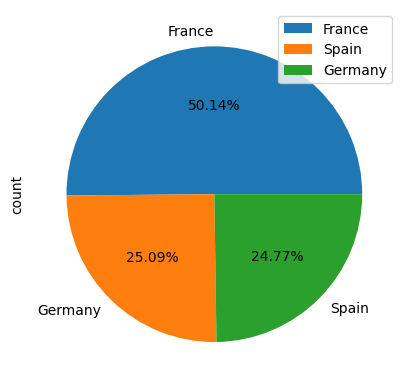

['Female' 'Male']
Gender
Male      5457
Female    4543
Name: count, dtype: int64


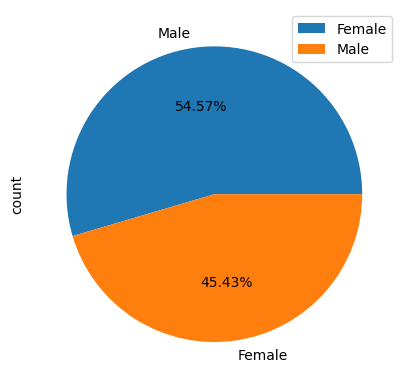

[1 0]
Exited
0    7963
1    2037
Name: count, dtype: int64


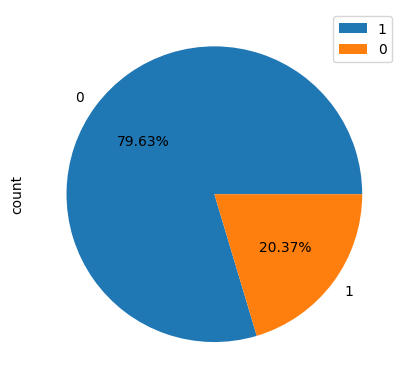

[1 0]
HasCrCard
1    7055
0    2945
Name: count, dtype: int64


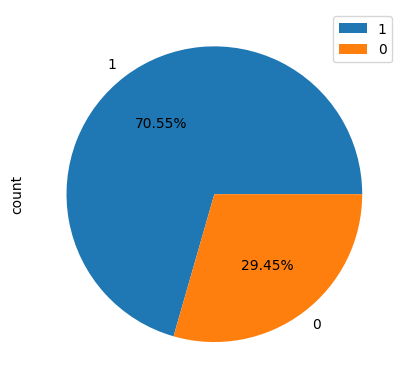

In [7]:
name = ['Geography','Gender','Exited','HasCrCard']
for i in name:
    graph_plots(i)

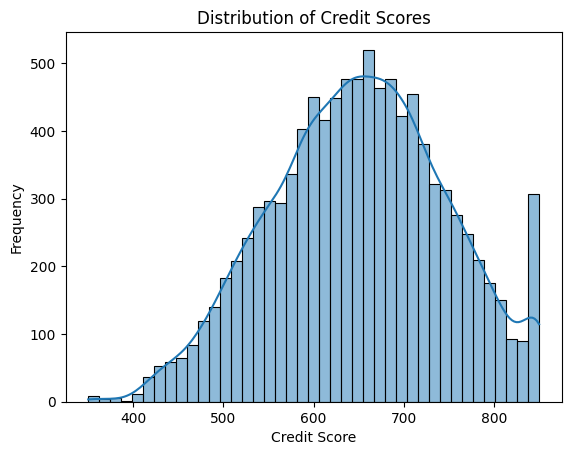

In [8]:
import seaborn as sns

sns.histplot(dataset['CreditScore'], kde=True)
plt.title('Distribution of Credit Scores')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

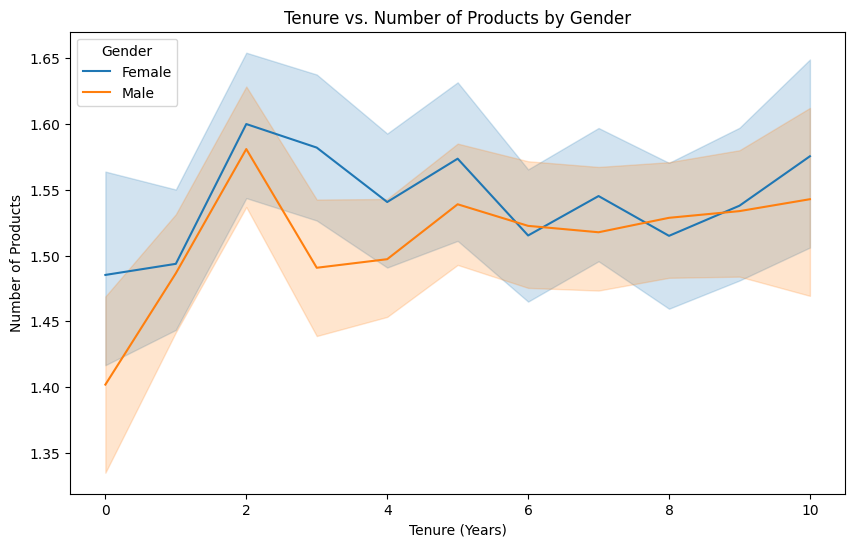

In [9]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=dataset, x='Tenure', y='NumOfProducts', hue='Gender')
plt.title('Tenure vs. Number of Products by Gender')
plt.xlabel('Tenure (Years)')
plt.ylabel('Number of Products')
plt.show()

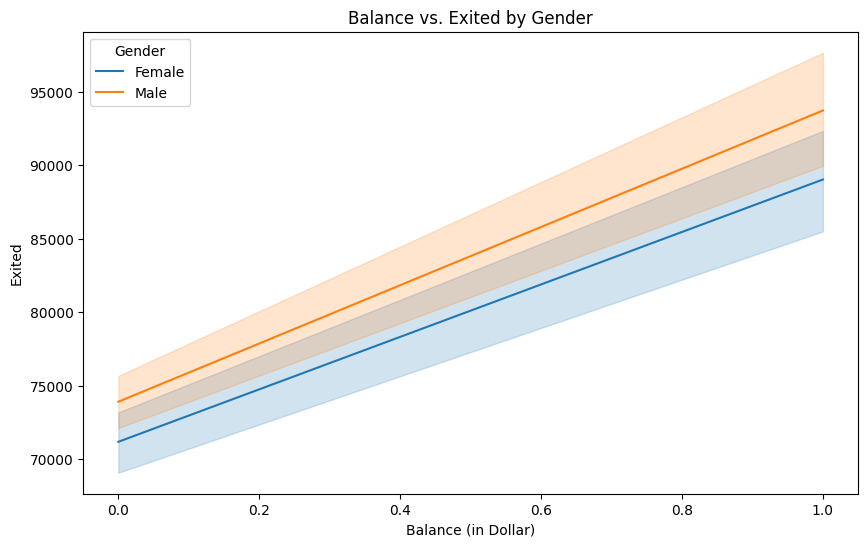

In [10]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=dataset, x='Exited', y='Balance', hue='Gender')
plt.title('Balance vs. Exited by Gender')
plt.xlabel('Balance (in Dollar)')
plt.ylabel('Exited')
plt.show()

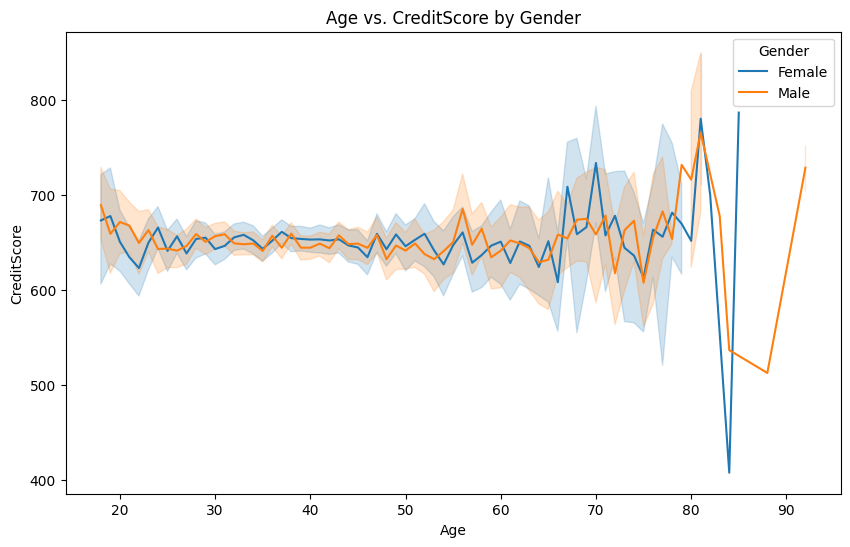

In [11]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=dataset, x='Age', y='CreditScore', hue='Gender')
plt.title('Age vs. CreditScore by Gender')
plt.xlabel('Age')
plt.ylabel('CreditScore')
plt.show()

In [12]:
# dropping unneccessary data frrom the dataset
dataset.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [13]:
# modifying data for simplicity in further steps
dataset["Gender"].replace({"Male":[1],"Female":[0]},inplace=True)
dataset["Geography"].replace({"France":[0],"Germany":[1],"Spain":[2]},inplace=True)

C:\Users\debas\AppData\Local\Temp\ipykernel_17120\2275580052.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["Gender"].replace({"Male":[1],"Female":[0]},inplace=True)
C:\Users\debas\AppData\Local\Temp\ipykernel_17120\2275580052.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset[

In [14]:
dataset.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
5,645,2,1,44,8,113755.78,2,1,0,149756.71,1
6,822,0,1,50,7,0.00,2,1,1,10062.80,0
7,376,1,0,29,4,115046.74,4,1,0,119346.88,1
8,501,0,1,44,4,142051.07,2,0,1,74940.50,0
9,684,0,1,27,2,134603.88,1,1,1,71725.73,0


In [15]:
X = dataset.drop(columns='Exited')
y = dataset['Exited']

In [16]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,1,1,42,3,75075.31,2,1,0,92888.52


In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=50)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [19]:
from sklearn.linear_model import LogisticRegression
from  sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [20]:
lrc = LogisticRegression()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [21]:
# applying Logistic Regression to the dataset
lrc.fit(X_train,y_train)
y_pred_lrc = lrc.predict(X_test)
print(accuracy_score(y_test,y_pred_lrc))
print(confusion_matrix(y_test,y_pred_lrc))
print(precision_score(y_test,y_pred_lrc))

0.8145
[[1544   54]
 [ 317   85]]
0.6115107913669064


In [22]:
# applying Random Forest Classifier to the dataset
rfc.fit(X_train,y_train)
y_pred_rfc = rfc.predict(X_test)
print(accuracy_score(y_test,y_pred_rfc))
print(confusion_matrix(y_test,y_pred_rfc))
print(precision_score(y_test,y_pred_rfc))

0.8555
[[1531   67]
 [ 222  180]]
0.728744939271255


In [23]:
# applying Gradient Boosting Classifier to the dataset
gbdt.fit(X_train,y_train)
y_pred_gbdt = gbdt.predict(X_test)
print(accuracy_score(y_test,y_pred_gbdt))
print(confusion_matrix(y_test,y_pred_gbdt))
print(precision_score(y_test,y_pred_gbdt))

0.8545
[[1542   56]
 [ 235  167]]
0.7488789237668162


In [24]:
# applying Xtra Gradient Boost to the dataset
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)
print(accuracy_score(y_test,y_pred_xgb))
print(confusion_matrix(y_test,y_pred_xgb))
print(precision_score(y_test,y_pred_xgb))

0.854
[[1518   80]
 [ 212  190]]
0.7037037037037037


we can see that the gradient bost classifier is the best option for the model

In [25]:
import pickle

pickle.dump(gbdt,open('model.pkl','wb'))
